In [2]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sb

%matplotlib inline

In [4]:
address = 'drinksbycountry.csv'
drinks = pd.read_csv(address, encoding = 'utf-8')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


Lets look at Average beer servings 

In [5]:
drinks['beer_servings'].mean()

106.16062176165804

We Want to know that How beer_servings varied from Asia to Europe or by continent.
This is where groupby is useful.
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [6]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

Filter the DataFrame by Asia. We want to know Average beer servings for Asia

In [7]:
drinks[drinks['continent'] == 'Asia'].beer_servings.mean()

37.04545454545455

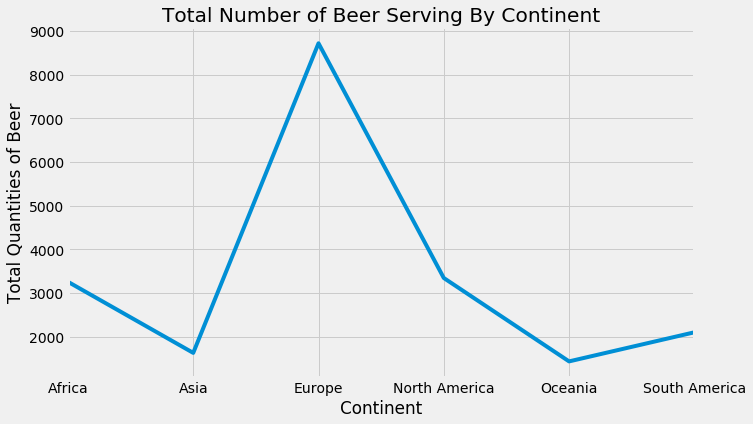

In [16]:
rcParams['figure.figsize'] = (10, 6)
plt.style.use('fivethirtyeight')
drinks.groupby('continent').beer_servings.sum().plot()
plt.title('Total Number of Beer Serving By Continent')
plt.xlabel('Continent')
plt.ylabel('Total Quantities of Beer')
plt.show()

In [11]:
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

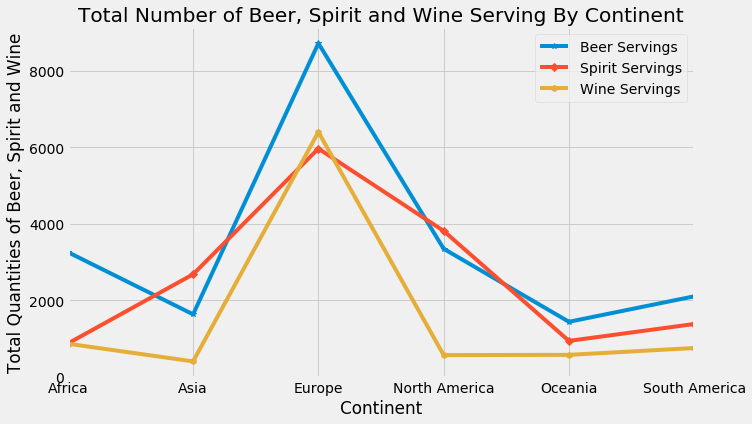

In [20]:
rcParams['figure.figsize'] = (10, 6)
plt.style.use('fivethirtyeight')

drinks.groupby('continent').beer_servings.sum().plot(label = 'Beer Servings', marker = '*')
drinks.groupby('continent').spirit_servings.sum().plot(label = 'Spirit Servings', marker = 'D')
drinks.groupby('continent').wine_servings.sum().plot(label = 'Wine Servings', marker = 'h')

plt.title('Total Number of Beer, Spirit and Wine Serving By Continent')
plt.xlabel('Continent')
plt.ylabel('Total Quantities of Beer, Spirit and Wine')
plt.legend()
plt.show()

###### We can use aggregate function for a specic column and visualize the data

In [21]:
drinks.groupby('continent').wine_servings.agg(['count', 'max', 'min', 'mean', 'sum'])

,count,max,min,mean,sum
continent,,,,,
Africa,53,233,0,16.264151,862
Asia,44,123,0,9.068182,399
Europe,45,370,0,142.222222,6400
North America,23,100,1,24.521739,564
Oceania,16,212,0,35.625000,570
South America,12,221,1,62.416667,749


In [24]:
drinks[drinks['continent'] == 'Asia'].wine_servings.agg(['count', 'max', 'min', 'mean', 'sum'])

count     44.000000
max      123.000000
min        0.000000
mean       9.068182
sum      399.000000
Name: wine_servings, dtype: float64

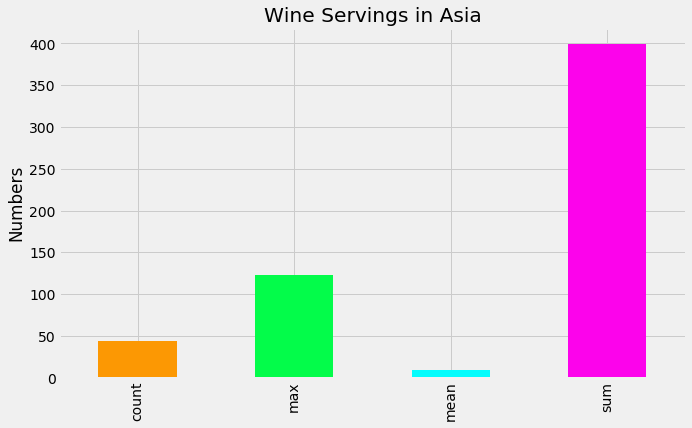

In [27]:
drinks[drinks['continent'] == 'Asia'].wine_servings.agg(['count', 'max', 'mean', 'sum']).plot(
    kind='bar', color = ['#fc9803', '#03fc4a', '#03fcfc', '#fc03eb'])

plt.title('Wine Servings in Asia')
plt.ylabel('Numbers')
plt.show()

In [ ]:
Visualize the Average of All products by Continent

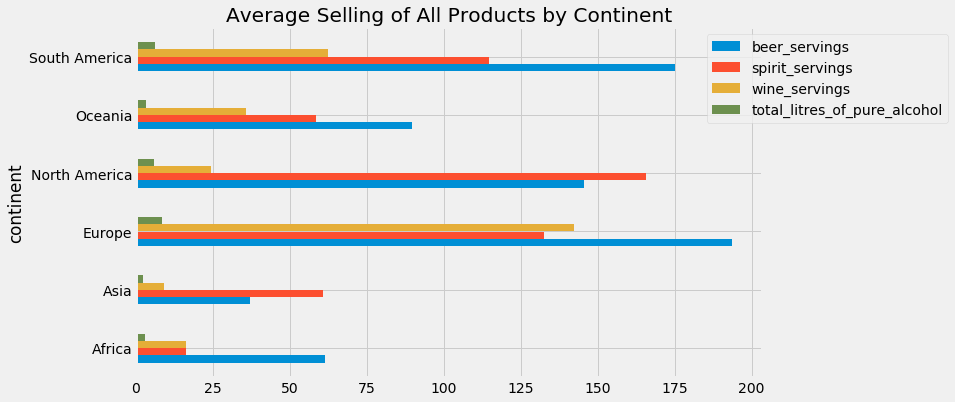

In [42]:
drinks.groupby('continent').mean().plot(kind = 'barh')

plt.title('Average Selling of All Products by Continent')
plt.legend(loc = 'best', bbox_to_anchor=(0.9, 1))
plt.show()

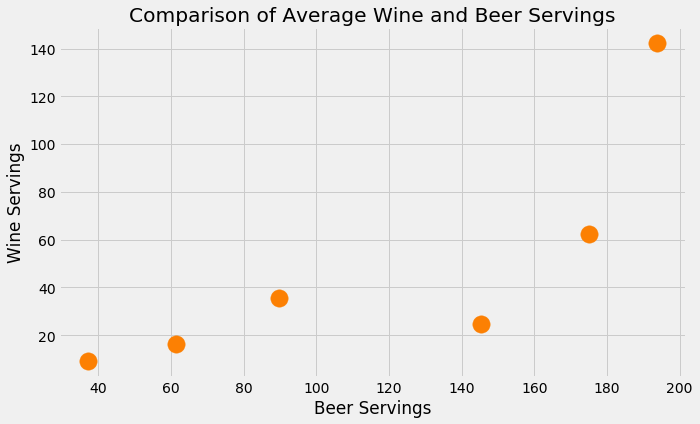

In [69]:
beer = drinks.groupby('continent').beer_servings.mean()
wine = drinks.groupby('continent').wine_servings.mean()

plt.scatter(x = beer, y = wine, color = '#fc8003', s = 300)
plt.title('Comparison of Average Wine and Beer Servings')
plt.xlabel('Beer Servings')
plt.ylabel('Wine Servings')
plt.show()

#### Finally

Groupby Split the data based on column(s)/condition(s) into groups.
Groupby Apply a function to all the groups and combine the results into an output.